In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import itertools

In [2]:
# グラフの設定
fontsize_title = 25
fontsize_label = 20

# サンプリング周波数
fs = 100

In [3]:
# CSVファイルを読み込む
path = "./logs/change_speed_2/"
acc_file_name = f"{path}Accelerometer.csv"
gyro_file_name = f"{path}Gyroscope.csv"

df_acc = pd.read_csv(acc_file_name, header=0, names=(
    "time", "x", "y", "z"))
df_gyro = pd.read_csv(gyro_file_name, header=0, names=(
    "time", "x", "y", "z"))

df_acc["time"] = df_acc["time"] - 2.5
df_gyro["time"] = df_gyro["time"] - 2.5

<Figure size 640x480 with 0 Axes>

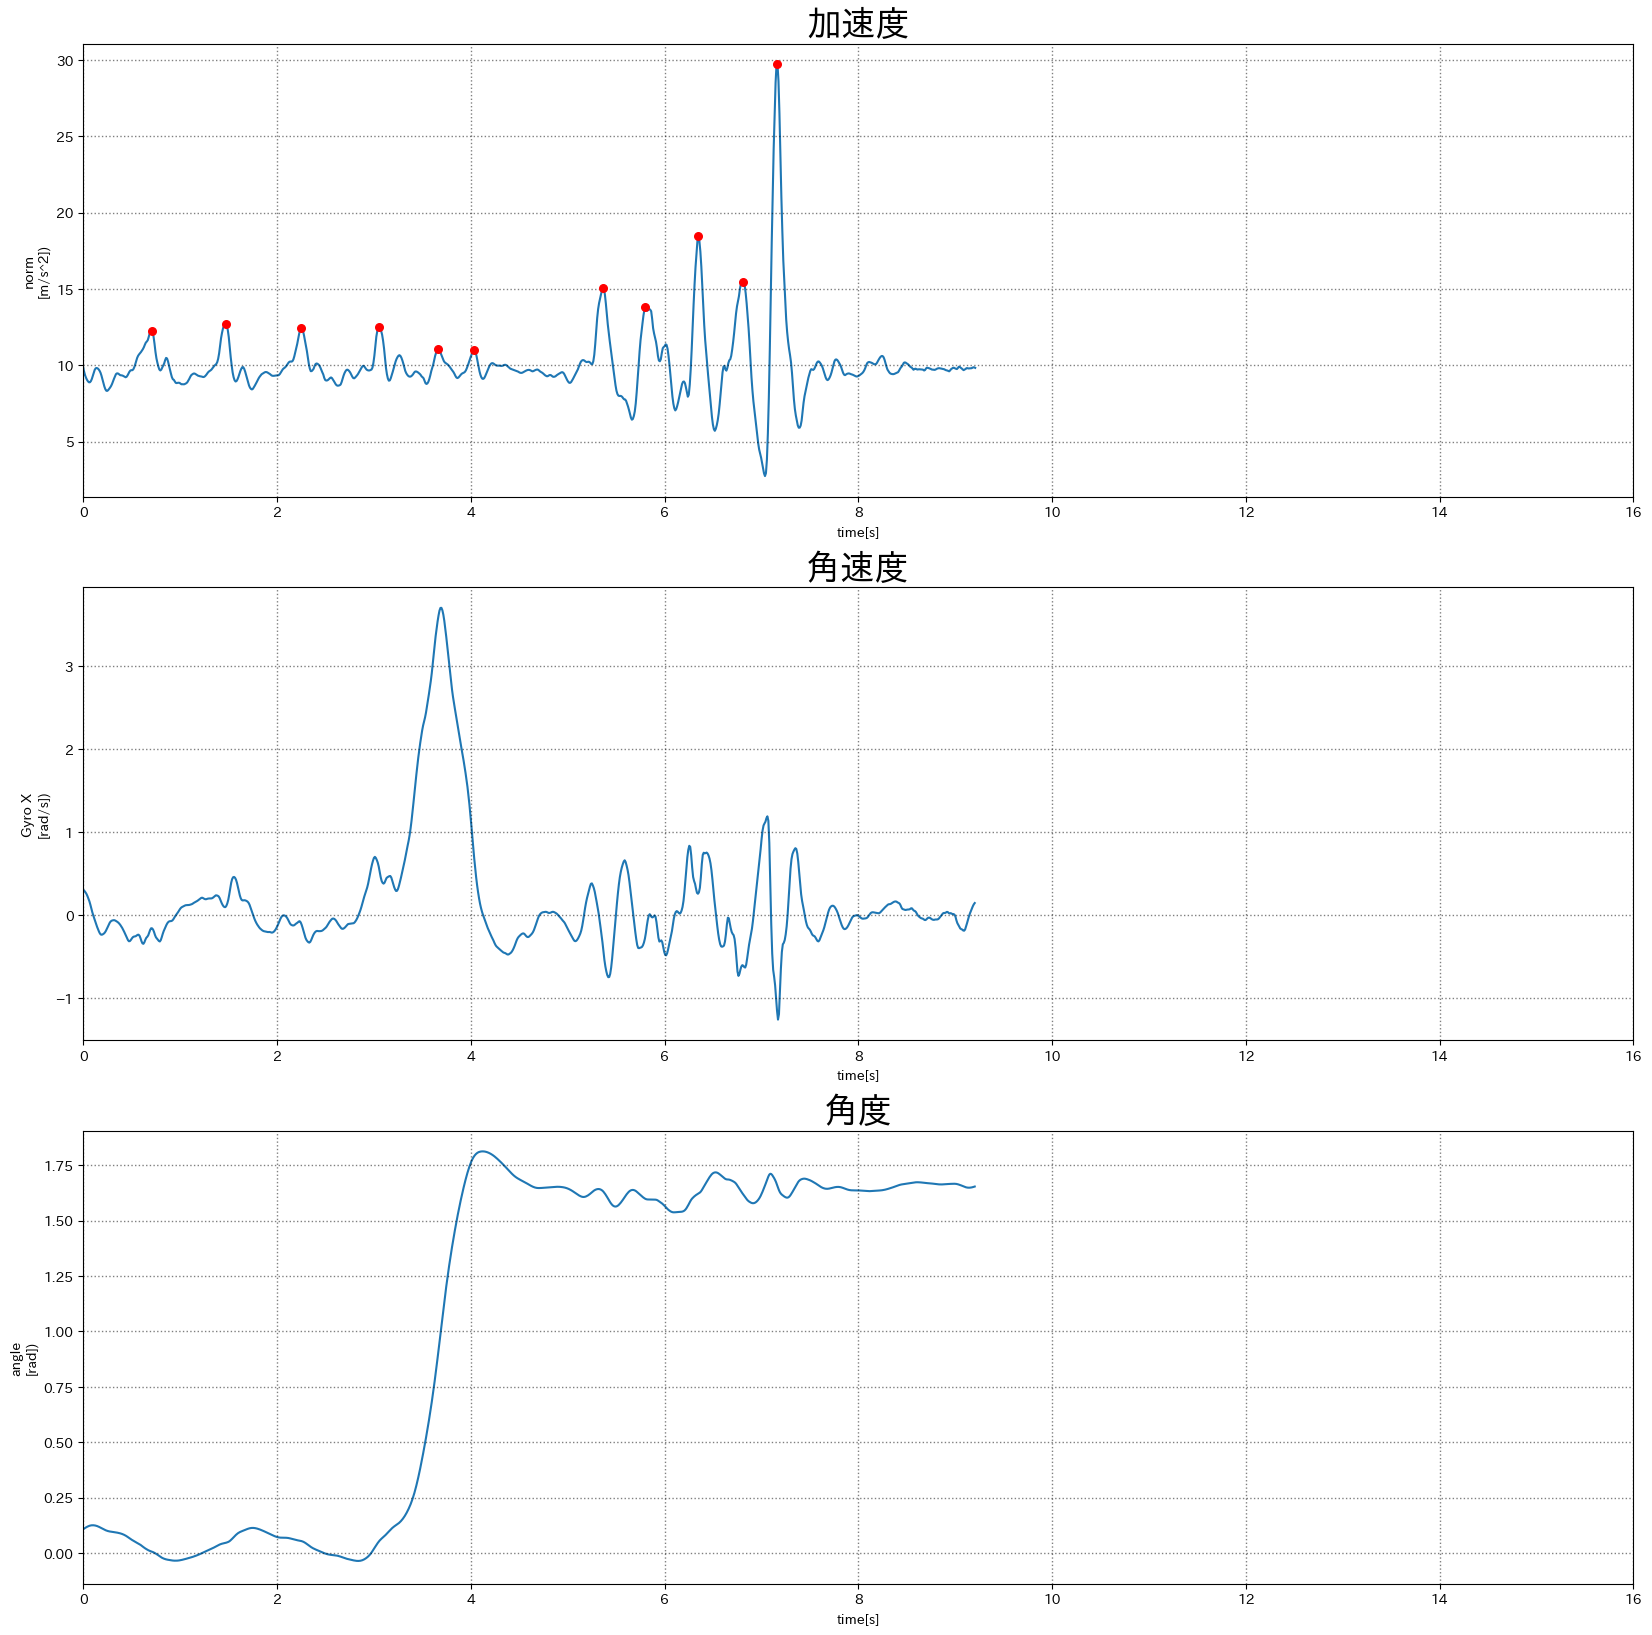

In [4]:
# ノルムを求める
df_acc['norm'] = np.linalg.norm(df_acc[['x', 'y', 'z']], axis=1)

# 角度を求める
df_gyro['angle'] = np.cumsum(df_gyro['x']) / fs

# window=10の移動平均
df_acc['low_norm'] = df_acc['norm'].rolling(window=10).mean()
df_gyro['low_x'] = df_gyro['x'].rolling(window=10).mean()
df_gyro['low_angle'] = df_gyro['angle'].rolling(window=10).mean()

# グラフを描画する
plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(20, 20))

## 加速度
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df_acc['time'], df_acc['low_norm'], zorder=1)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlim(0, 16)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2])')

### ピークを描画
peek, _ = signal.find_peaks(df_acc['low_norm'], distance=30, height=11)
ax1.scatter(df_acc['time'][peek], df_acc['low_norm'][peek], s=30, color='red', zorder=2)

## 角速度
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df_gyro['time'], df_gyro['low_x'], zorder=1)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('角速度', fontdict={'size': fontsize_title})
ax2.set_xlim(0, 16)
plt.xlabel('time[s]')
plt.ylabel('Gyro X\n[rad/s])')

## 角度
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df_gyro['time'], df_gyro['low_angle'], zorder=1)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('角度', fontdict={'size': fontsize_title})
ax3.set_xlim(0, 16)
plt.xlabel('time[s]')
plt.ylabel('angle\n[rad])')

plt.show()


0.7146585139040029
0.692924948758098
0.706960040607437
0.6986726026976365
0.7002733910130506
0.6534770563995209
0.6525198078535642
0.7812649259813125
0.7415783578618687
0.8906571599060158
0.7957083044888176
1.251143565656387


(0.0, 6.0)

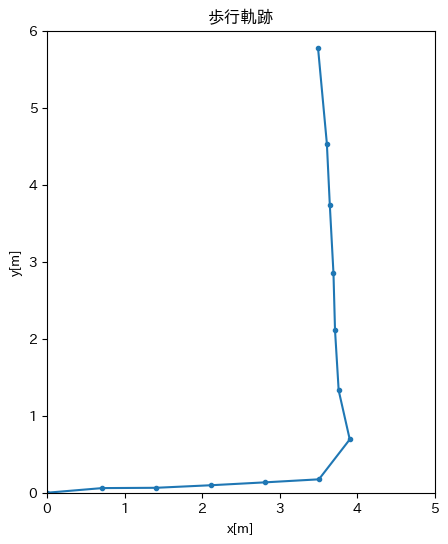

In [11]:
# 軌跡を描く
peek, _ = signal.find_peaks(df_acc['low_norm'], distance=30, height=11)

point = [[0, 0]]
for p in peek:
    step = df_acc['low_norm'][p] * 0.032 + 0.3
    print(step)
    x = step * np.cos(df_gyro['low_angle'][p]) + point[-1][0]
    y = step * np.sin(df_gyro['low_angle'][p]) + point[-1][1]

    point.append([x, y])

point = pd.DataFrame(data=point, columns=['x', 'y'])
point['x'] = point['x'] - point['x'][0]
point['y'] = point['y'] - point['y'][0]

plt.figure(figsize=(5, 6))

plt.plot(point['x'], point['y'], '.-')
plt.title('歩行軌跡')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.xlim(0, 5)
plt.ylim(0, 6)
